In [13]:
!pip install tensorflow==2.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Overview

<img src="https://cdn1.katadata.co.id/media/images/thumb/2021/09/21/Bunga_tulip-2021_09_21-10_53_13_5b3cecf73729c96f6aea6b843c9ccd2b_620x413_thumb.jpg" alt="gambar tulip">







Children are visual learners, which makes the use of a flower classification model a great way to engage them in learning about different types of flowers.
in this project by providing children with an interactive tool that enables them to identify and learn about flowers, the flower classification model can help spark their curiosity and encourage them to explore more about the natural world. 

Dataset Source : https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

In [ ]:
import os
import random
from PIL import Image
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
original_dataset_dir = '/content/drive/MyDrive/Dataset/Flower/train'
flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Exploratory Data Analysis

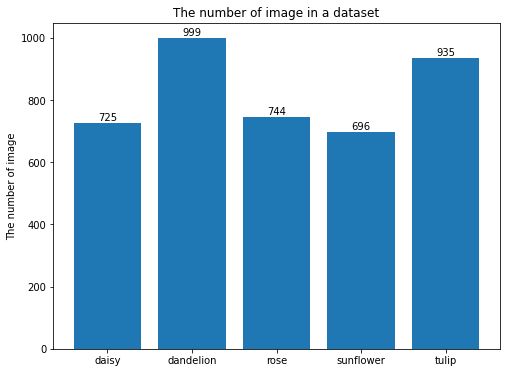

In [ ]:
num_images_flowers = []

for flower in flowers:
    path = os.path.join(original_dataset_dir, flower)
    num_images_flower = len(os.listdir(path))
    num_images_flowers.append(num_images_flower)

num_images = sum(num_images_flowers)

# membuat bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(flowers, num_images_flowers)
ax.set_title('The number of image in a dataset')
ax.set_ylabel('The number of image')
for i, v in enumerate(num_images_flowers):
    ax.text(i, v + 10, str(v), color='black', ha='center')
plt.show()

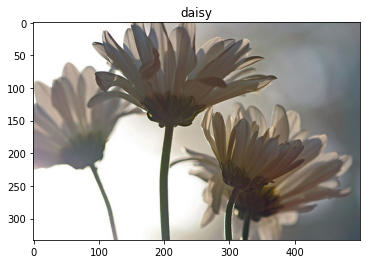

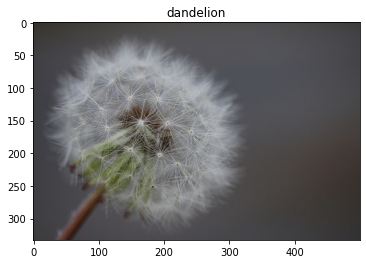

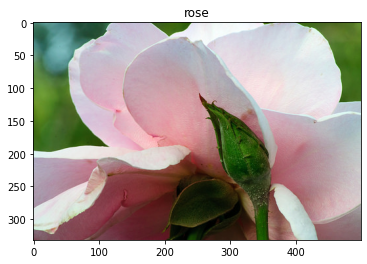

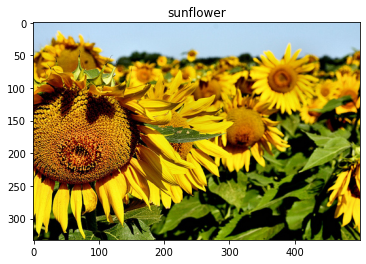

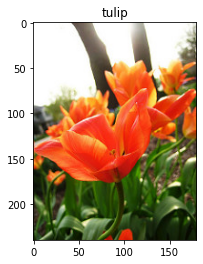

In [ ]:
for flower in flowers:
    path = os.path.join(original_dataset_dir, flower)
    random_image = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_image)
    img = mpimg.imread(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(flower)

plt.show()

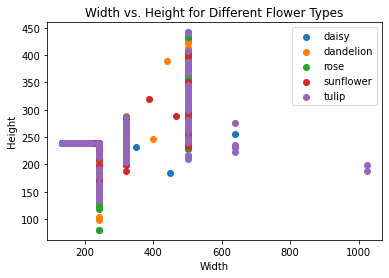

In [ ]:
# create empty lists to store the width and height of each flower
widths = []
heights = []
flower_types = []

# iterate over each flower category
for flower in flowers:
    # set the path to the flower category directory
    flower_dir = os.path.join(original_dataset_dir, flower)
    
    # iterate over each image in the flower category
    for filename in os.listdir(flower_dir):
        # set the path to the image file
        img_path = os.path.join(flower_dir, filename)
        
        # read the image file and get its width and height
        img = plt.imread(img_path)
        height, width, channels = img.shape
        
        # append the width, height, and flower type to the corresponding lists
        widths.append(width)
        heights.append(height)
        flower_types.append(flower)

# create a pandas DataFrame to store the width, height, and flower type data for each image
data = {'Width': widths, 'Height': heights, 'Flower Type': flower_types}
df = pd.DataFrame(data)

# create a scatterplot of width vs. height for each flower type
plt.figure()
for flower in flowers:
    subset = df[df['Flower Type'] == flower]
    plt.scatter(subset['Width'], subset['Height'], label=flower)

plt.title('Width vs. Height for Different Flower Types')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()

In [ ]:
# source directory and destination directory
source_dir = '/content/drive/MyDrive/Dataset/Flower/train'
target_dir = '/content/drive/MyDrive/Dataset/Flower/train_resized'

# the new size of the image
new_size = (200, 200)

# Loop through each flower type and each image in the source directory
for flower in flowers:
    flower_source_dir = os.path.join(source_dir, flower)
    flower_target_dir = os.path.join(target_dir, flower)
    
    # Create the target directory if it does not exist
    if not os.path.exists(flower_target_dir):
        os.makedirs(flower_target_dir)
    
    for filename in os.listdir(flower_source_dir):
        # Opening image using PIL
        img = Image.open(os.path.join(flower_source_dir, filename))
        
        # Resize Images
        img = img.resize(new_size, resample=Image.BICUBIC)
        
        # Save the resized image to the target directory
        img.save(os.path.join(flower_target_dir, filename))


# Modeling

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

Split the data into training and validation sets with an 80:20 ratio.

In [ ]:
# Preparing a training dataset
train_data = datagen.flow_from_directory(
        target_dir,  # Training data directory
        target_size=(200, 200),
        subset='training',
        batch_size=32,
        class_mode='categorical',
        seed = 99)

# Preparing a validation dataset
val_data = datagen.flow_from_directory(
        target_dir, # Validation data directory
        target_size=(200, 200),
        subset='validation',
        batch_size=32,
        class_mode='categorical',
        seed = 99)

Found 3281 images belonging to 5 classes.
Found 818 images belonging to 5 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1, name='rotation'),
    tf.keras.layers.RandomZoom(0.1, name='zoom'),
    tf.keras.layers.Rescaling(1./255)
  ]
)

data augmentation to increase the training data

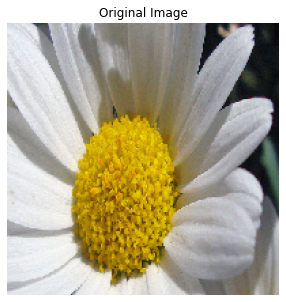

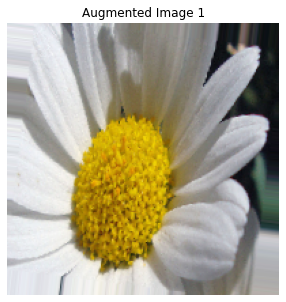

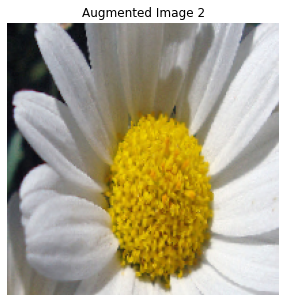

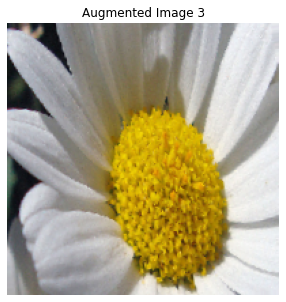

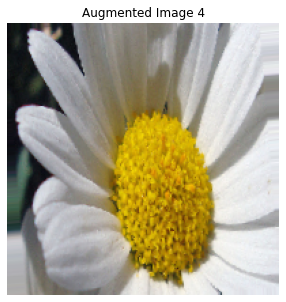

In [ ]:
image_path = '/content/drive/MyDrive/Dataset/Flower/train/daisy/10140303196_b88d3d6cec.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(200, 200))

x = tf.keras.preprocessing.image.img_to_array(image)
x = x.reshape((1,) + x.shape)

# Membuat objek data augmentation
data_augmentation_ex = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

# Membuat plot untuk gambar asli
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Augmentasi data dan membuat plot untuk setiap gambar yang telah di-augmentasi
i = 0
for batch in data_augmentation_ex.flow(x, batch_size=1):
    i += 1
    if i > 4:
        break
    plt.figure(figsize=(5,5))
    plt.imshow(batch[0])
    plt.title(f'Augmented Image {i}')
    plt.axis('off')

# Menampilkan plot
plt.show()

## CNN

In [ ]:
# Defining a model
model_cnn = tf.keras.Sequential([
    data_augmentation,
    
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Dropout layer to avoid overfitting
    layers.Dropout(0.5),
    
    # Fully connected layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compiling the model with loss function and optimizer
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_cnn = model_cnn.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
103/103 [==============================] - 16s 140ms/step - loss: 1.2902 - accuracy: 0.4425 - val_loss: 1.4894 - val_accuracy: 0.4022
Epoch 2/20
103/103 [==============================] - 14s 139ms/step - loss: 1.0704 - accuracy: 0.5706 - val_loss: 1.0622 - val_accuracy: 0.5807
Epoch 3/20
103/103 [==============================] - 17s 163ms/step - loss: 0.9600 - accuracy: 0.6175 - val_loss: 0.9346 - val_accuracy: 0.6259
Epoch 4/20
103/103 [==============================] - 13s 129ms/step - loss: 0.9229 - accuracy: 0.6349 - val_loss: 0.9446 - val_accuracy: 0.6357
Epoch 5/20
103/103 [==============================] - 13s 130ms/step - loss: 0.8877 - accuracy: 0.6528 - val_loss: 0.9655 - val_accuracy: 0.6357
Epoch 6/20
103/103 [==============================] - 16s 160ms/step - loss: 0.8221 - accuracy: 0.6845 - val_loss: 0.8579 - val_accuracy: 0.6663
Epoch 7/20
103/103 [==============================] - 21s 208ms/step - loss: 0.7926 - accuracy: 0.6986 - val_loss: 0.8762 - val_ac

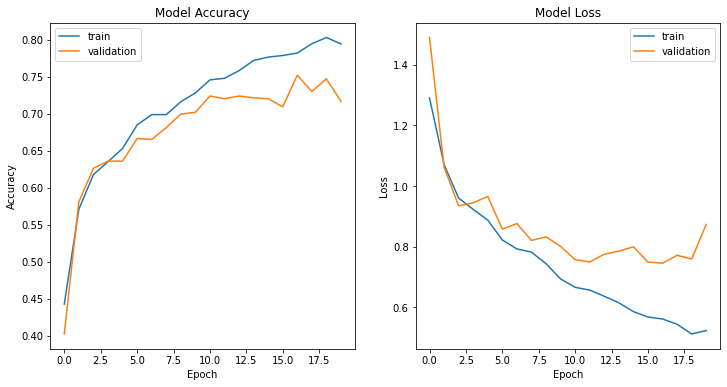

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history_cnn.history['accuracy'], label='train')
ax1.plot(history_cnn.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_cnn.history['loss'], label='train')
ax2.plot(history_cnn.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

## VGG16

In [16]:
# load pre-trained VGG16 model
vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# freeze all layers in VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# create new model based on VGG16 and add new layers
model_vgg_nt = tf.keras.Sequential([
    data_augmentation,
    vgg_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# compile model with loss function and optimizer
model_vgg_nt.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [17]:
history_vgg_nt = model_vgg_nt.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
103/103 [==============================] - 20s 183ms/step - loss: 0.9677 - accuracy: 0.6525 - val_loss: 0.6341 - val_accuracy: 0.7714
Epoch 2/20
103/103 [==============================] - 19s 183ms/step - loss: 0.6073 - accuracy: 0.7839 - val_loss: 0.5544 - val_accuracy: 0.7861
Epoch 3/20
103/103 [==============================] - 19s 180ms/step - loss: 0.5059 - accuracy: 0.8165 - val_loss: 0.5772 - val_accuracy: 0.7836
Epoch 4/20
103/103 [==============================] - 18s 178ms/step - loss: 0.4705 - accuracy: 0.8315 - val_loss: 0.7052 - val_accuracy: 0.7396
Epoch 5/20
103/103 [==============================] - 18s 178ms/step - loss: 0.4236 - accuracy: 0.8461 - val_loss: 0.5318 - val_accuracy: 0.8056
Epoch 6/20
103/103 [==============================] - 19s 180ms/step - loss: 0.3544 - accuracy: 0.8747 - val_loss: 0.5414 - val_accuracy: 0.8240
Epoch 7/20
103/103 [==============================] - 18s 179ms/step - loss: 0.3482 - accuracy: 0.8796 - val_loss: 0.6401 - val_ac

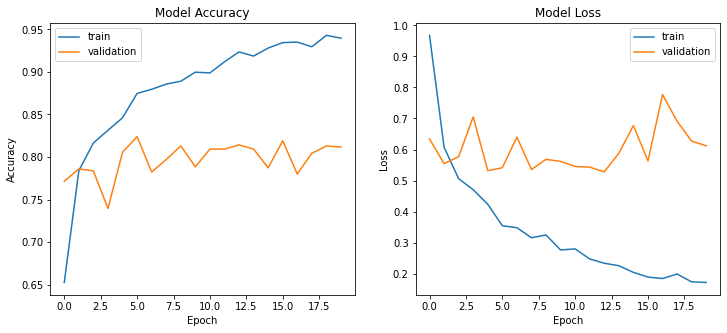

In [18]:
# Not trainable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history_vgg_nt.history['accuracy'], label='train')
ax1.plot(history_vgg_nt.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_vgg_nt.history['loss'], label='train')
ax2.plot(history_vgg_nt.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [ ]:
# freeze all layers in VGG16 model
for layer in vgg_model.layers:
    layer.trainable = True

# create new model based on VGG16 and add new layers
model_vgg_t = tf.keras.Sequential([
    data_augmentation,
    vgg_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# compile model with loss function and optimizer
model_vgg_t.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_vgg_t = model_vgg_t.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
103/103 [==============================] - 42s 399ms/step - loss: 1.9080 - accuracy: 0.2932 - val_loss: 1.3480 - val_accuracy: 0.3973
Epoch 2/20
103/103 [==============================] - 40s 389ms/step - loss: 1.2888 - accuracy: 0.4535 - val_loss: 1.1898 - val_accuracy: 0.5403
Epoch 3/20
103/103 [==============================] - 40s 392ms/step - loss: 1.2237 - accuracy: 0.4788 - val_loss: 1.1453 - val_accuracy: 0.5391
Epoch 4/20
103/103 [==============================] - 40s 391ms/step - loss: 1.1515 - accuracy: 0.5312 - val_loss: 1.1067 - val_accuracy: 0.5538
Epoch 5/20
103/103 [==============================] - 40s 391ms/step - loss: 1.1165 - accuracy: 0.5468 - val_loss: 1.2054 - val_accuracy: 0.4963
Epoch 6/20
103/103 [==============================] - 40s 392ms/step - loss: 1.0778 - accuracy: 0.5736 - val_loss: 1.0576 - val_accuracy: 0.6015
Epoch 7/20
103/103 [==============================] - 40s 392ms/step - loss: 1.0582 - accuracy: 0.5712 - val_loss: 0.9977 - val_ac

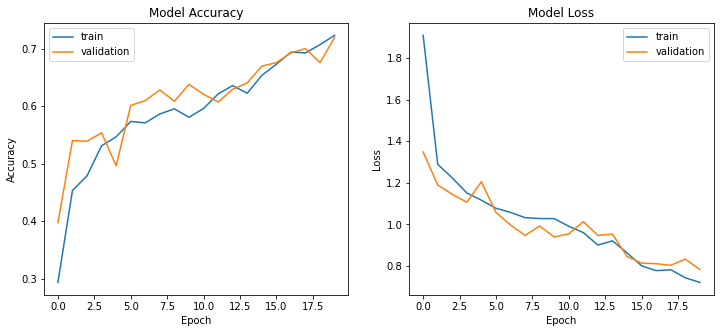

In [ ]:
# Not trainable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history_vgg_t.history['accuracy'], label='train')
ax1.plot(history_vgg_t.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_vgg_t.history['loss'], label='train')
ax2.plot(history_vgg_t.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

## Densenet121

In [19]:
# load pre-trained DenseNet model
densenet_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# freeze all layers in DenseNet model
for layer in densenet_model.layers:
    layer.trainable = False

# create new model based on DenseNet and add new layers
model_densenet_nt = tf.keras.Sequential([
    data_augmentation,
    densenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# compile model with loss function and optimizer
model_densenet_nt.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

29097984/29084464 [==============================] - 3s 0us/step


In [20]:
history_densenet_nt = model_densenet_nt.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
103/103 [==============================] - 27s 183ms/step - loss: 0.9140 - accuracy: 0.6498 - val_loss: 0.4482 - val_accuracy: 0.8411
Epoch 2/20
103/103 [==============================] - 14s 136ms/step - loss: 0.5535 - accuracy: 0.7867 - val_loss: 0.3755 - val_accuracy: 0.8692
Epoch 3/20
103/103 [==============================] - 15s 143ms/step - loss: 0.4673 - accuracy: 0.8214 - val_loss: 0.3425 - val_accuracy: 0.8851
Epoch 4/20
103/103 [==============================] - 15s 143ms/step - loss: 0.4092 - accuracy: 0.8513 - val_loss: 0.3504 - val_accuracy: 0.8790
Epoch 5/20
103/103 [==============================] - 15s 147ms/step - loss: 0.3756 - accuracy: 0.8598 - val_loss: 0.3150 - val_accuracy: 0.8924
Epoch 6/20
103/103 [==============================] - 15s 145ms/step - loss: 0.3438 - accuracy: 0.8735 - val_loss: 0.3466 - val_accuracy: 0.8729
Epoch 7/20
103/103 [==============================] - 15s 143ms/step - loss: 0.3392 - accuracy: 0.8696 - val_loss: 0.3298 - val_ac

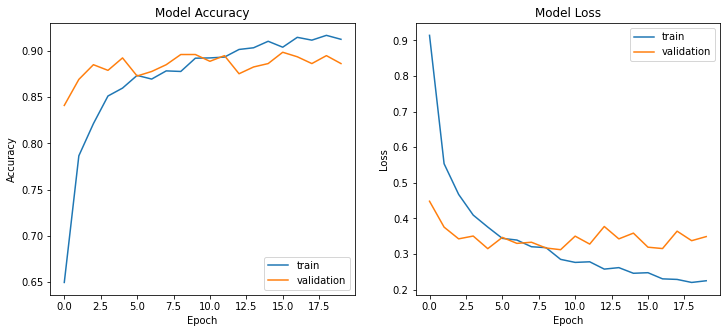

In [21]:
# Not Trainable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history_densenet_nt.history['accuracy'], label='train')
ax1.plot(history_densenet_nt.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_densenet_nt.history['loss'], label='train')
ax2.plot(history_densenet_nt.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [ ]:
# load pre-trained DenseNet model
densenet_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# freeze all layers in DenseNet model
for layer in densenet_model.layers:
    layer.trainable = True

# create new model based on DenseNet and add new layers
model_densenet_t = tf.keras.Sequential([
    data_augmentation,
    densenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# compile model with loss function and optimizer
model_densenet_t.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_densenet_t = model_densenet_t.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
103/103 [==============================] - 48s 341ms/step - loss: 0.9435 - accuracy: 0.6675 - val_loss: 5.6751 - val_accuracy: 0.5037
Epoch 2/20
103/103 [==============================] - 33s 321ms/step - loss: 0.6619 - accuracy: 0.7723 - val_loss: 1.2517 - val_accuracy: 0.7311
Epoch 3/20
103/103 [==============================] - 33s 321ms/step - loss: 0.5471 - accuracy: 0.8116 - val_loss: 0.5235 - val_accuracy: 0.8362
Epoch 4/20
103/103 [==============================] - 35s 336ms/step - loss: 0.5245 - accuracy: 0.8162 - val_loss: 0.7457 - val_accuracy: 0.7555
Epoch 5/20
103/103 [==============================] - 33s 323ms/step - loss: 0.4797 - accuracy: 0.8375 - val_loss: 0.5999 - val_accuracy: 0.8350
Epoch 6/20
103/103 [==============================] - 33s 321ms/step - loss: 0.4372 - accuracy: 0.8513 - val_loss: 0.7781 - val_accuracy: 0.7873
Epoch 7/20
103/103 [==============================] - 33s 323ms/step - loss: 0.3954 - accuracy: 0.8674 - val_loss: 0.7858 - val_ac

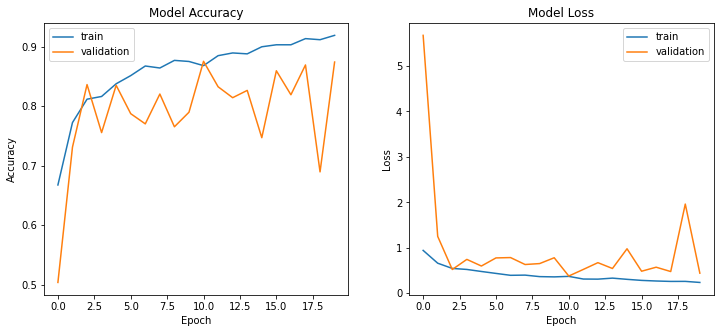

In [ ]:
# Trainable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history_densenet_t.history['accuracy'], label='train')
ax1.plot(history_densenet_t.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_densenet_t.history['loss'], label='train')
ax2.plot(history_densenet_t.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

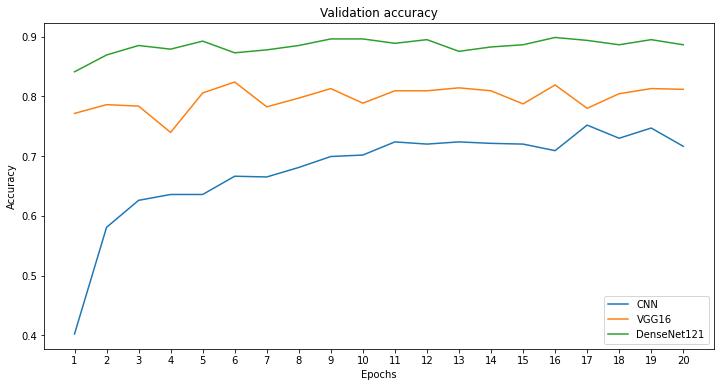

In [23]:
train_acc = history_vgg_nt.history['accuracy']
epochs = range(1, len(train_acc) + 1)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(epochs, history_cnn.history['val_accuracy'], label='CNN')
ax.plot(epochs, history_vgg_nt.history['val_accuracy'], label='VGG16')
ax.plot(epochs, history_densenet_nt.history['val_accuracy'], label='DenseNet121')
ax.set_title('Validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_xticks(np.arange(1, len(train_acc)+1, 1))
plt.show()

# Test

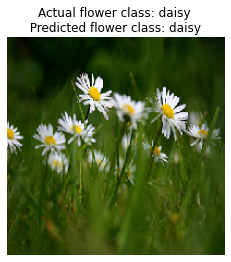

In [ ]:
class_indices = train_data.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
class_names = list(class_indices.values())

# load image
img_path = '/content/drive/MyDrive/Dataset/Flower/test/daisy/105806915_a9c13e2106_n.jpg'
img = image.load_img(img_path, target_size=(200, 200)) # resize the image to 224 x 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# predict
preds = model_densenet_nt.predict(x, batch_size=32)
class_idx = np.argmax(preds)

# get actual class name from image path
actual_class_name = img_path.split('/')[-2]

# show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Actual flower class: {actual_class_name} \n Predicted flower class: {class_names[class_idx]} ")
plt.show()

In [ ]:
model_densenet_nt.save('/content/drive/MyDrive/Dataset/flower_classification.h5')

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Dataset/flower_classification.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>